# Model Training

### Importing packages

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Flatten, Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

### Image Data Argumentation

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

### Loading Our Data And Perform Data Argumentation

In [3]:
x_train = train_datagen.flow_from_directory(r'C:\Users\adhar\Desktop\Nalaiya Thiran 2\IBM-Project-48502-1660808182\Dataset\train', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\adhar\Desktop\Nalaiya Thiran 2\IBM-Project-48502-1660808182\Dataset\test', target_size=(64, 64), batch_size=3, color_mode='grayscale', class_mode='categorical')

Found 594 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [4]:
print(x_train.class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5}


### Initializing The Model

In [5]:
model=Sequential()

### Adding CNN Layers

In [6]:
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [7]:
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [8]:
model.add(Flatten())

### Adding Dense Layers

In [9]:
model.add(Dense(units=512, activation='relu'))

In [10]:
model.add(Dense(units=6, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               3211776   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3

### Configure The Learning Process

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

### Train The Model

In [13]:
model.fit_generator(x_train,
                    steps_per_epoch =594/3,
                    epochs=25,
                    validation_data=x_test,
                    validation_steps=30/3)

C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
198/198 [==============================] - 7s 32ms/step - loss: 0.7803 - accuracy: 0.7222 - val_loss: 0.0635 - val_accuracy: 1.0000
Epoch 2/25
198/198 [==============================] - 6s 30ms/step - loss: 0.1845 - accuracy: 0.9343 - val_loss: 0.0907 - val_accuracy: 0.9667
Epoch 3/25
198/198 [==============================] - 6s 30ms/step - loss: 0.1161 - accuracy: 0.9646 - val_loss: 0.1865 - val_accuracy: 0.9333
Epoch 4/25
198/198 [==============================] - 6s 32ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.1234 - val_accuracy: 0.9667
Epoch 5/25
198/198 [==============================] - 6s 32ms/step - loss: 0.0837 - accuracy: 0.9731 - val_loss: 0.0094 - val_accuracy: 1.0000
Epoch 6/25
198/198 [==============================] - 6s 32ms/step - loss: 0.0352 - accuracy: 0.9882 - val_loss: 0.1159 - val_accuracy: 0.9667
Epoch 7/25
198/198 [==============================] - 6s 32ms/step - loss: 0.0494 - accuracy: 0.9815 - val_loss: 0.0077 - val_accuracy: 1.0000

### Save The Model

In [15]:
model.save('gesture.h5')

In [16]:
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
     json_file.write(model_json)

# Model Testing

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model = load_model("gesture.h5")

In [7]:
img = image.load_img(r'C:\Users\adhar\Desktop\Nalaiya Thiran 2\IBM-Project-48502-1660808182\Dataset\test\1\1.jpg', grayscale=True, target_size=(64,64))
x = image.img_to_array(img)
x.shape

C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


(64, 64, 1)

In [3]:
x = np.expand_dims(x,axis=0)
x.shape

(1, 64, 64, 1)

In [4]:
pred_x = model.predict(x)
pred_x=np.argmax(pred_x,axis=1)
pred_x

array([1], dtype=int64)

In [5]:
index=['0', '1', '2', '3', '4', '5']
result=str(index[pred_x[0]])
result

'1'

In [16]:
import numpy as np
p=[]
for i in range(0,6):
  for j in range(0,5):
    img = image.load_img(r"C:\\Users\\adhar\\Desktop\Nalaiya Thiran 2\\IBM-Project-48502-1660808182\\Dataset\test\\"+str(i)+"\\"+str(j)+".jpg", grayscale=True, target_size=(64,64))
# img = image.load_img("img.jpg",grayscale="False",target_size=(64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis=0)
    pred = np.argmax(model.predict(x),axis=-1)
    p.append(pred)
print(p)

ValueError: in user code:

    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\adhar\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape (None, None, None, 3)


In [7]:
result = []
index=['0','1','2','3','4','5']
for i in p:
  result.append(index[i[0]])
print(result)

['0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5']


Populating the interactive namespace from numpy and matplotlib


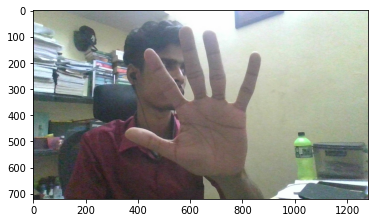

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# imgs = mpimg.imread(r"C:\Users\adhar\Desktop\Nalaiya Thiran 2\IBM-Project-48502-1660808182\Dataset\test\2\2.jpg")
imgs =mpimg.imread("img.jpg")
imgplot = plt.imshow(imgs)
plt.show()